### Homework 1: Vertebral Column Data Set
### Name: Daniel Jang
### GitHub: hjang8659
### USC ID: 6894-6426-04
### Due: Feb 2, 2024
### Submitted: Feb 3, 2024 (1 day late)

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithms and Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import DistanceMetric
from scipy.linalg import pinv

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Feature Scaling and Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

import tensorflow as tf
from tensorflow import keras

c:\Users\hjang\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [2]:
file_path = ".../data/column_2C.dat"
custom_column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

df = pd.read_csv(file_path, delimiter=' ', names=custom_column_names)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [3]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


### (b) Pre-Processing and Exploratory data analysis:
### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [4]:
df['abnormal'] = (df['class'] == 'AB').astype(int)
df = df.drop(columns=['class'])

In [5]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,abnormal
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


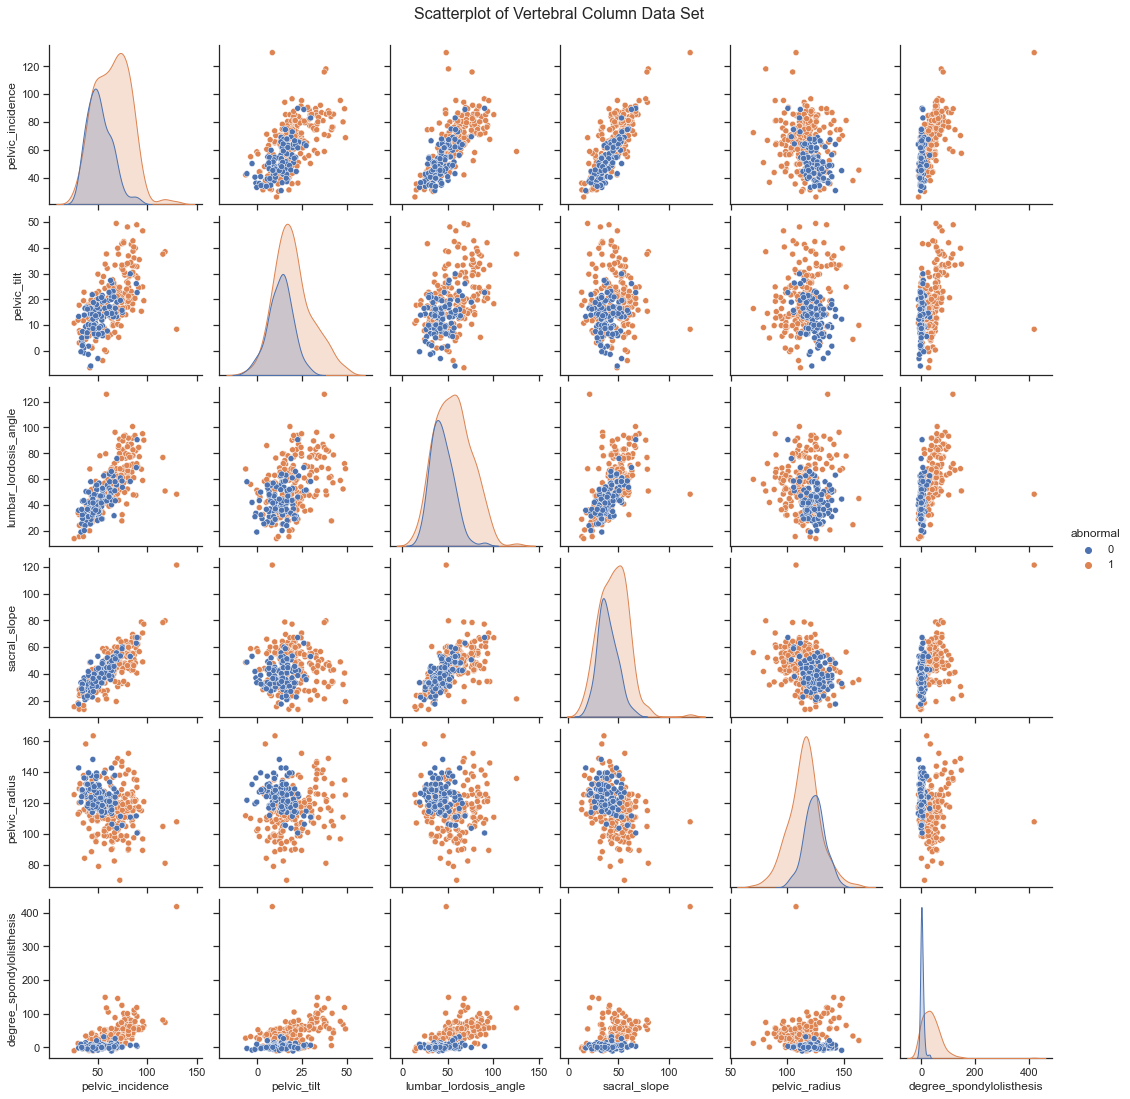

In [6]:
sns.set(style="ticks")
pairplot = sns.pairplot(df, hue="abnormal", diag_kind="kde")
plt.suptitle("Scatterplot of Vertebral Column Data Set", y=1.02, fontsize=16)
plt.show();

### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

<Figure size 1200x800 with 0 Axes>

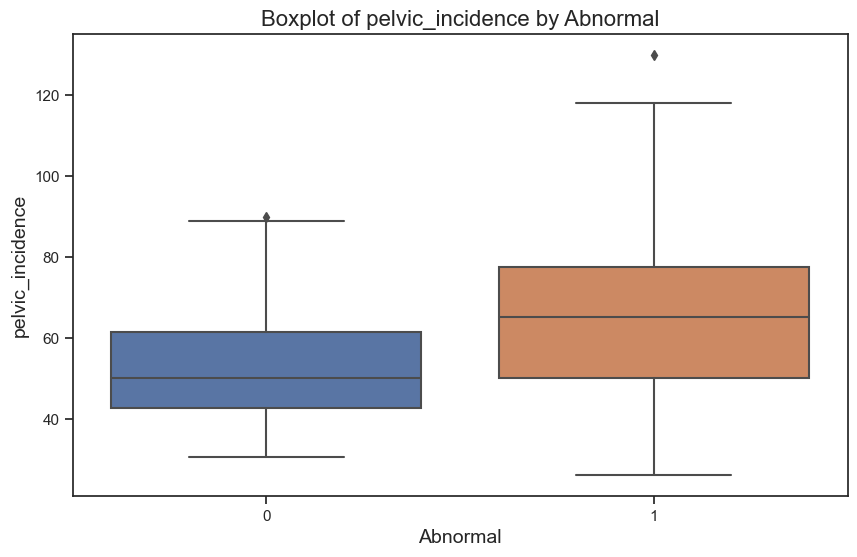

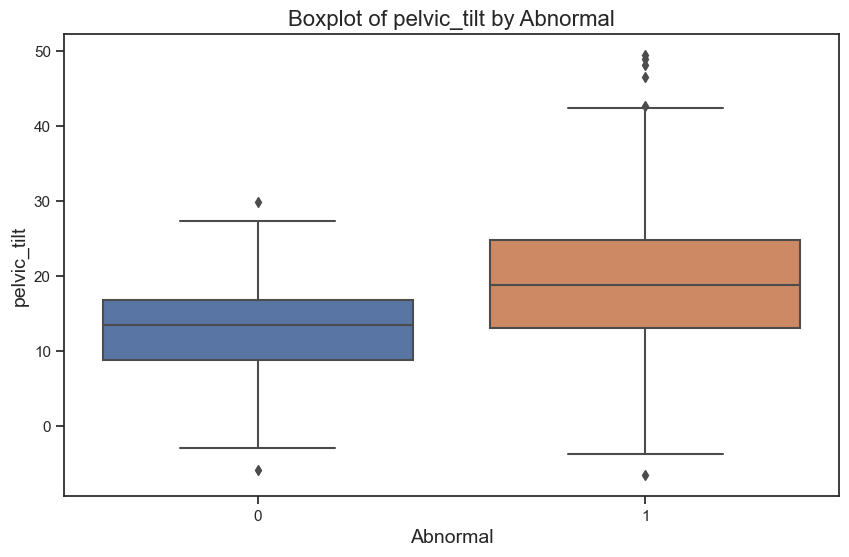

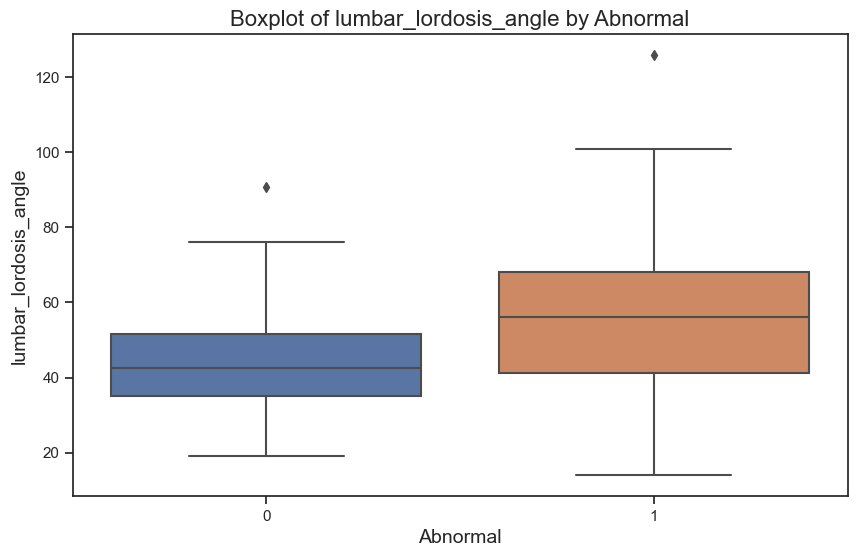

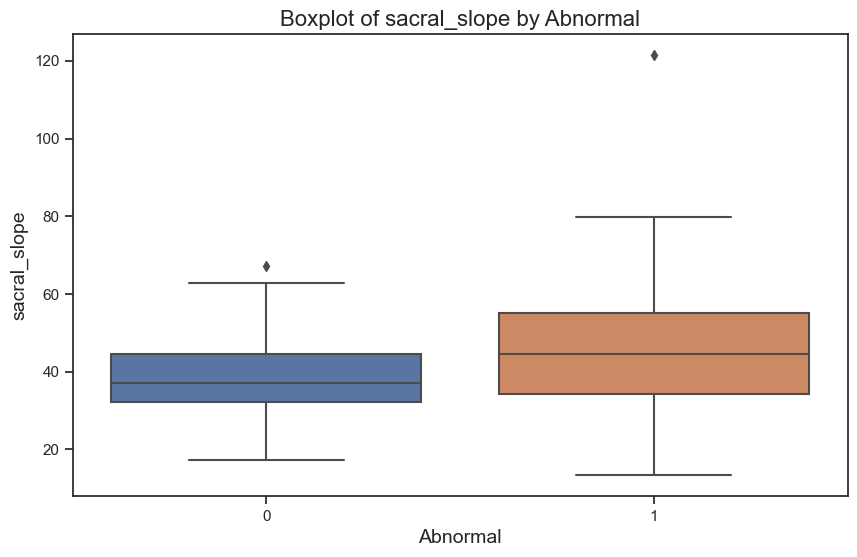

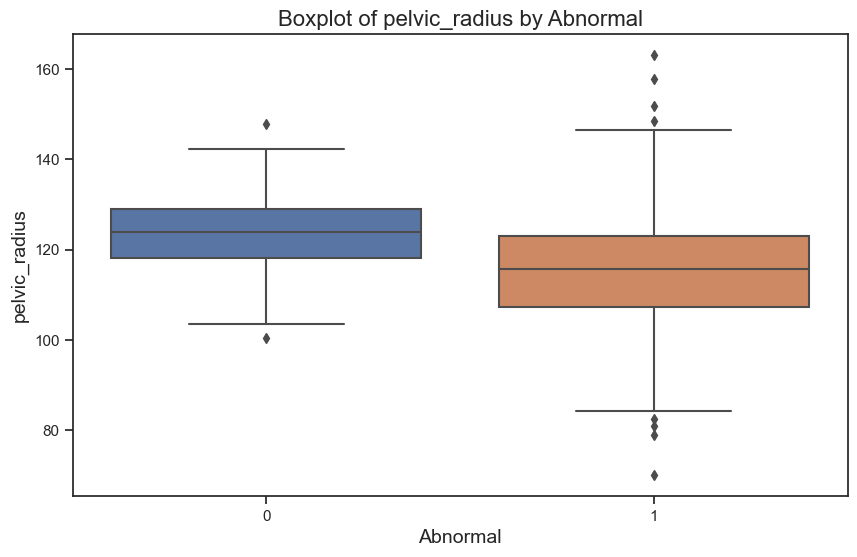

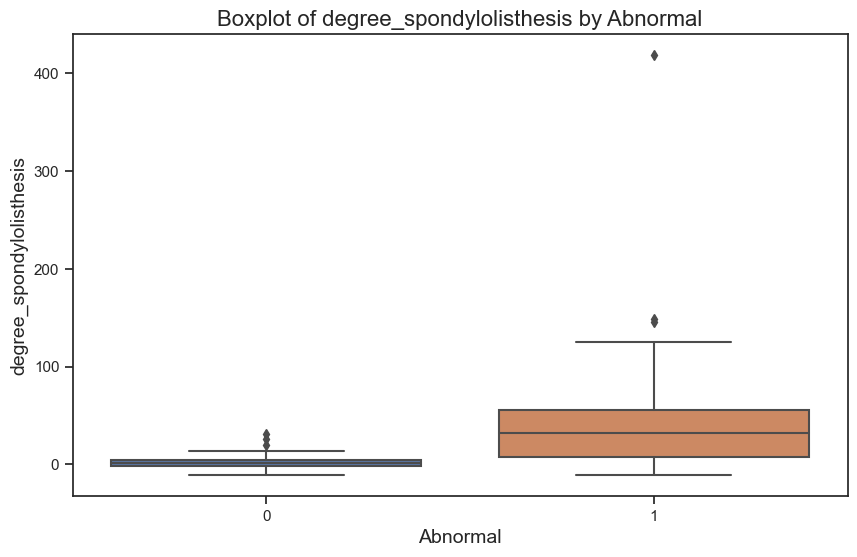

In [7]:
plt.figure(figsize=(12, 8))
for col in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="abnormal", y=col, data=df)
    plt.title(f"Boxplot of {col} by Abnormal", fontsize=16)
    plt.xlabel("Abnormal", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.show();

### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [8]:
train_0 = df.loc[df['abnormal'] == 0].iloc[:70, :]
train_1 = df.loc[df['abnormal'] == 1].iloc[:140, :]

train_set = pd.concat([train_0, train_1], axis=0)
test_set = df.drop(train_set.index)

### (c) Classification using KNN on Vertebral Column Data Set
### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [9]:
X_train = train_set.drop('abnormal', axis=1)
y_train = train_set['abnormal']

X_test = test_set.drop('abnormal', axis=1)
y_test = test_set['abnormal']

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling ...

In [10]:
k_range = list(range(208, 0, -3))
min_e = float('inf')
best_k = 0

train_error = []
test_error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_error.append(1 - train_accuracy)

    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    curr = 1 - test_accuracy
    test_error.append(curr)

    if curr < min_e:
        min_e = curr
        best_k = k

print("Best k for Euclidean Distance::", best_k)
print("Best error rate:", min_e)

Best k for Euclidean Distance:: 4
Best error rate: 0.06000000000000005


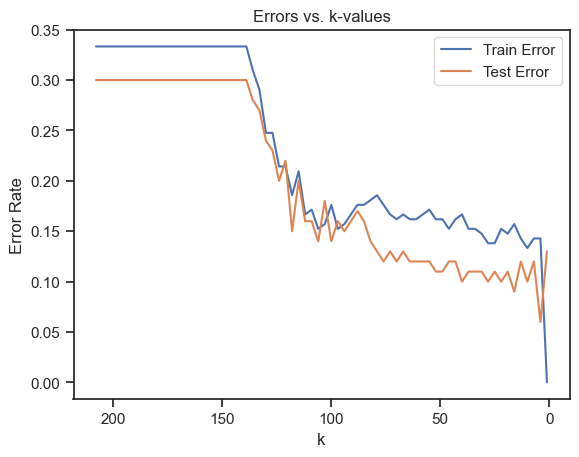

In [11]:
plt.plot(k_range, train_error, label='Train Error')
plt.plot(k_range, test_error, label='Test Error')
plt.title('Errors vs. k-values')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.gca().invert_xaxis()
plt.legend()
plt.show();

In [12]:
knn_best_k = KNeighborsClassifier(n_neighbors = best_k, metric='euclidean')
knn_best_k.fit(X_train, y_train)
y_test_pred_best_k = knn_best_k.predict(X_test)

confusion = confusion_matrix(y_test, y_test_pred_best_k)
tn, fn, tp, fp = confusion[0][0], confusion[1][0], confusion[1][1], confusion[0][1]

true_positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * true_positive_rate) / (precision + true_positive_rate)

print("Confusion Matrix k:", best_k)
print(confusion)
print("True Positive Rate:", true_positive_rate)
print("True Negative Rate:", true_negative_rate)
print("Precision:", precision)
print("F1-Score:", f1_score)

Confusion Matrix k: 4
[[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1-Score: 0.9583333333333333


### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set ...

In [13]:
max_train_size = range(10, 211, 10)
train_sizes = []
test_error_rates = []

for train_size in max_train_size:
    train_0_sub = train_0.iloc[:train_size // 3, :]
    train_1_sub = train_1.iloc[:train_size - train_size // 3, :]
    
    train_set_sub = pd.concat([train_0_sub, train_1_sub], axis=0)
    X_train_sub = train_set_sub.drop('abnormal', axis=1)
    y_train_sub = train_set_sub['abnormal']

    best_k_sub = 0
    min_e = float('inf')

    for k_sub in range(1, train_size + 1, 5):
        knn_sub = KNeighborsClassifier(n_neighbors=k_sub, metric='euclidean')
        knn_sub.fit(X_train_sub, y_train_sub)

        y_test_pred_sub = knn_sub.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_test_pred_sub)

        if error_rate < min_e:
            best_k_sub = k_sub
            min_e = error_rate

    train_sizes.append(train_size)
    test_error_rates.append(min_e)

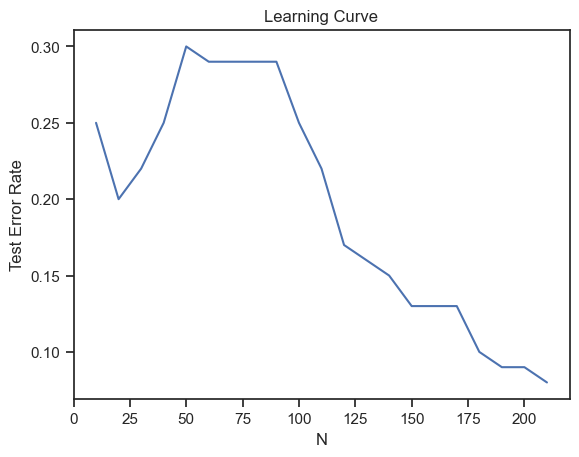

In [14]:
plt.plot(train_sizes, test_error_rates)
plt.title('Learning Curve')
plt.xlabel('N')
plt.ylabel('Test Error Rate')
plt.show();

### (d) Replace the Euclidean metric with the following metrics and test them ...
### i. Minkowski Distance:
### A.

In [15]:
best_k_manhattan = 0
min_error_manhattan = float('inf')

for k in range(1, 197, 5):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)

    y_test_pred_manhattan = knn_manhattan.predict(X_test)
    error_manhattan = 1 - accuracy_score(y_test, y_test_pred_manhattan)
    
    if error_manhattan < min_error_manhattan:
        min_error_manhattan = error_manhattan
        best_k_manhattan = k

print("Best k for Manhattan Distance:", best_k_manhattan)
print("Best error rate:", min_error_manhattan)

Best k for Manhattan Distance: 6
Best error rate: 0.10999999999999999


### B.

In [16]:
best_k_log_scaled = best_k_manhattan
best_log10_p = 0
min_error_log_scaled = float('inf')

for log10_p in np.arange(0, 1.1, 0.1):
    p = 10 ** log10_p
    knn_log_scaled = KNeighborsClassifier(n_neighbors=best_k_manhattan, p=p)
    knn_log_scaled.fit(X_train, y_train)

    y_test_pred_log_scaled = knn_log_scaled.predict(X_test)
    error_log_scaled = 1 - accuracy_score(y_test, y_test_pred_log_scaled)

    if error_log_scaled < min_error_log_scaled:
        min_error_log_scaled = error_log_scaled
        best_log10_p = log10_p

print("Best log10(p) for Log-scaled Minkowski Distance:", best_log10_p)
print("Best error rate:", min_error_log_scaled)

Best log10(p) for Log-scaled Minkowski Distance: 0.6000000000000001
Best error rate: 0.06000000000000005


### C.

In [17]:
best_k_chebyshev = 0
min_error_chebyshev = float('inf')

for k in range(1, 197, 5):
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn_chebyshev.fit(X_train, y_train)

    y_test_pred_chebyshev = knn_chebyshev.predict(X_test)
    error_chebyshev = 1 - accuracy_score(y_test, y_test_pred_chebyshev)

    if error_chebyshev < min_error_chebyshev:
        min_error_chebyshev = error_chebyshev
        best_k_chebyshev = k

print("Best k for Chebyshev Distance:", best_k_chebyshev)
print("Best error rate:", min_error_chebyshev)

Best k for Chebyshev Distance: 16
Best error rate: 0.07999999999999996


### ii. Manhalanobis Distance:

In [18]:
best_k_mahalanobis = 0
min_error_mahalanobis = float('inf')
cov_matrix = np.cov(X_train, rowvar=False)

for k in range(1, 197, 5):
    inv_cov_matrix = pinv(cov_matrix)

    knn_mahalanobis = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    knn_mahalanobis.fit(X_train, y_train)

    y_test_pred_mahalanobis = knn_mahalanobis.predict(X_test)
    error_mahalanobis = 1 - accuracy_score(y_test, y_test_pred_mahalanobis)

    if error_mahalanobis < min_error_mahalanobis:
        min_error_mahalanobis = error_mahalanobis
        best_k_mahalanobis = k

print("Best k for Mahalanobis Distance:", best_k_mahalanobis)
print("Best error rate:", min_error_mahalanobis)

Best k for Mahalanobis Distance: 1
Best error rate: 0.17000000000000004


### Test error table
note: Log-scaled Minkowski's best k is from Manhattan.

In [19]:
data = {
    'Metric': ['Manhattan', 'Log-scaled Minkowski', 'Chebyshev', 'Mahalanobis'],
    'Best k': [best_k_manhattan, best_k_manhattan, best_k_chebyshev, best_k_mahalanobis],
    'Best log10(p)': [None, best_log10_p, None, None],
    'Min Test Error': [min_error_manhattan, min_error_log_scaled, min_error_chebyshev, min_error_mahalanobis]
}

summary_table = pd.DataFrame(data)
print(summary_table)

                 Metric  Best k  Best log10(p)  Min Test Error
0             Manhattan       6            NaN            0.11
1  Log-scaled Minkowski       6            0.6            0.06
2             Chebyshev      16            NaN            0.08
3           Mahalanobis       1            NaN            0.17


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point ...

In [20]:
k_values = list(range(1, 197, 5))
results_dict = {'euclidean': {'best_k': 0, 'min_error': float('inf')},
                'manhattan': {'best_k': 0, 'min_error': float('inf')},
                'chebyshev': {'best_k': 0, 'min_error': float('inf')}}

for metric in results_dict.keys():
    for k in k_values:
        knn_weighted = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        knn_weighted.fit(X_train, y_train)

        y_test_pred_weighted = knn_weighted.predict(X_test)
        error_weighted = 1 - accuracy_score(y_test, y_test_pred_weighted)

        if error_weighted < results_dict[metric]['min_error']:
            results_dict[metric]['min_error'] = error_weighted
            results_dict[metric]['best_k'] = k

for metric, result in results_dict.items():
    print(metric)
    print("Best k:", result['best_k'])
    print("Min Test Error:", result['min_error'], "\n")

euclidean
Best k: 6
Min Test Error: 0.09999999999999998 

manhattan
Best k: 26
Min Test Error: 0.09999999999999998 

chebyshev
Best k: 16
Min Test Error: 0.10999999999999999 



### (f) What is the lowest training error rate you achieved in this homework?
The lowest training error rate achieved in this homework is 0.0 as shown in the graph in (c)ii.